In [1]:
import requests
import bs4
import re
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import math
from numpy import mean
from numpy import std


import sklearn
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Processed.csv')

## Linear Regression

Position and college are encoded using the sklearn preprocessing so they can be included in the regression model without issue and give useful data.

In [3]:
le = preprocessing.LabelEncoder()

le.fit(df["college_x"])
df["college_x"] = le.transform(df["college_x"])

le.fit(df["position_x"])
df["position_x"] = le.transform(df["position_x"])

y_salary2, x_df, and y_salary are made, with y_salary2 and y_salary being the same but y_salary2 is saved for use in the MLPRegressor and y_salary is used in Linear regression. both y_salary and y_salary2 hold the salary column, and x_df holds every column but salary.

The salary column of the dataframe df is log10'd, meaning they are converted into a smaller number from the millions they were originally so they are easier to process and comprehend.

The created dataframes are then splitted in to train, val, test sets with train_test_split, with train containing 0.85% of the data and val and test holding half of the remaining 15%.

In [4]:
y_salary2 = df['salary']
df["salary"] = np.log10(df['salary'])
x_df = df.drop(columns=["salary"])
y_salary = df["salary"]


X_train, X_rem, y_train, y_rem = train_test_split(x_df,y_salary, train_size=0.85, random_state=8575)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=8575)

The y_train, y_valid, and y_test sets are converted and their indeces are reset and the residual column 'index' is dropped at the same time. The linear regression model is then called and X_train and y_train is fit into it. Predict for X_valid is stored in predict and the predict for X_test is saved in predict2.

In [5]:
from numpy import std

reg = LinearRegression()
y_train = y_train.reset_index().drop(columns = 'index')
y_valid = y_valid.reset_index().drop(columns = 'index')
y_test = y_test.reset_index().drop(columns = 'index')
reg.fit(X_train, y_train)
predict = reg.predict(X_valid)
predict2 = reg.predict(X_test)

This prints out the Train, Val, test, and mean squared error of the linear regression model, ran and fitted on X_train and y_train.

In [6]:
print('Train score: '+ str(reg.score(X_train, y_train)))
print('Validate score: ' + str(reg.score(X_valid, y_valid)))
print('test score: ' + str(reg.score(X_test, y_test)))
print('Mean squared error: '+ str(mean_squared_error(y_true=y_valid, y_pred=predict, squared=False)))

Train score: 0.47707924028372084
Validate score: 0.6425296179048476
test score: 0.6503726059930571
Mean squared error: 0.23097522330440196


predict_df is created with predict so it is easier to graph

In [7]:
predict_df = pd.DataFrame()
predict_df['prediction'] = predict[:,0]
predict2_df = pd.DataFrame()
predict2_df['prediction'] = predict2[:,0]

This is the line plot of the prediction and ground truth labels for linear regression. It is plotted only to the first 200 so it is easier to see where there are discrepencies in the prediction and ground truth and where there is not. As is observable, there can be seen a good correlation between where there are drops and highs in ground truth and prediction, showing how the prediction of the linear regression model is very accurate, like how the score stated. There although can be seen discrepencies when there is a large outlier in salary or NCAA scores that do not linearly correlate to one another, such showing the missed predictions.

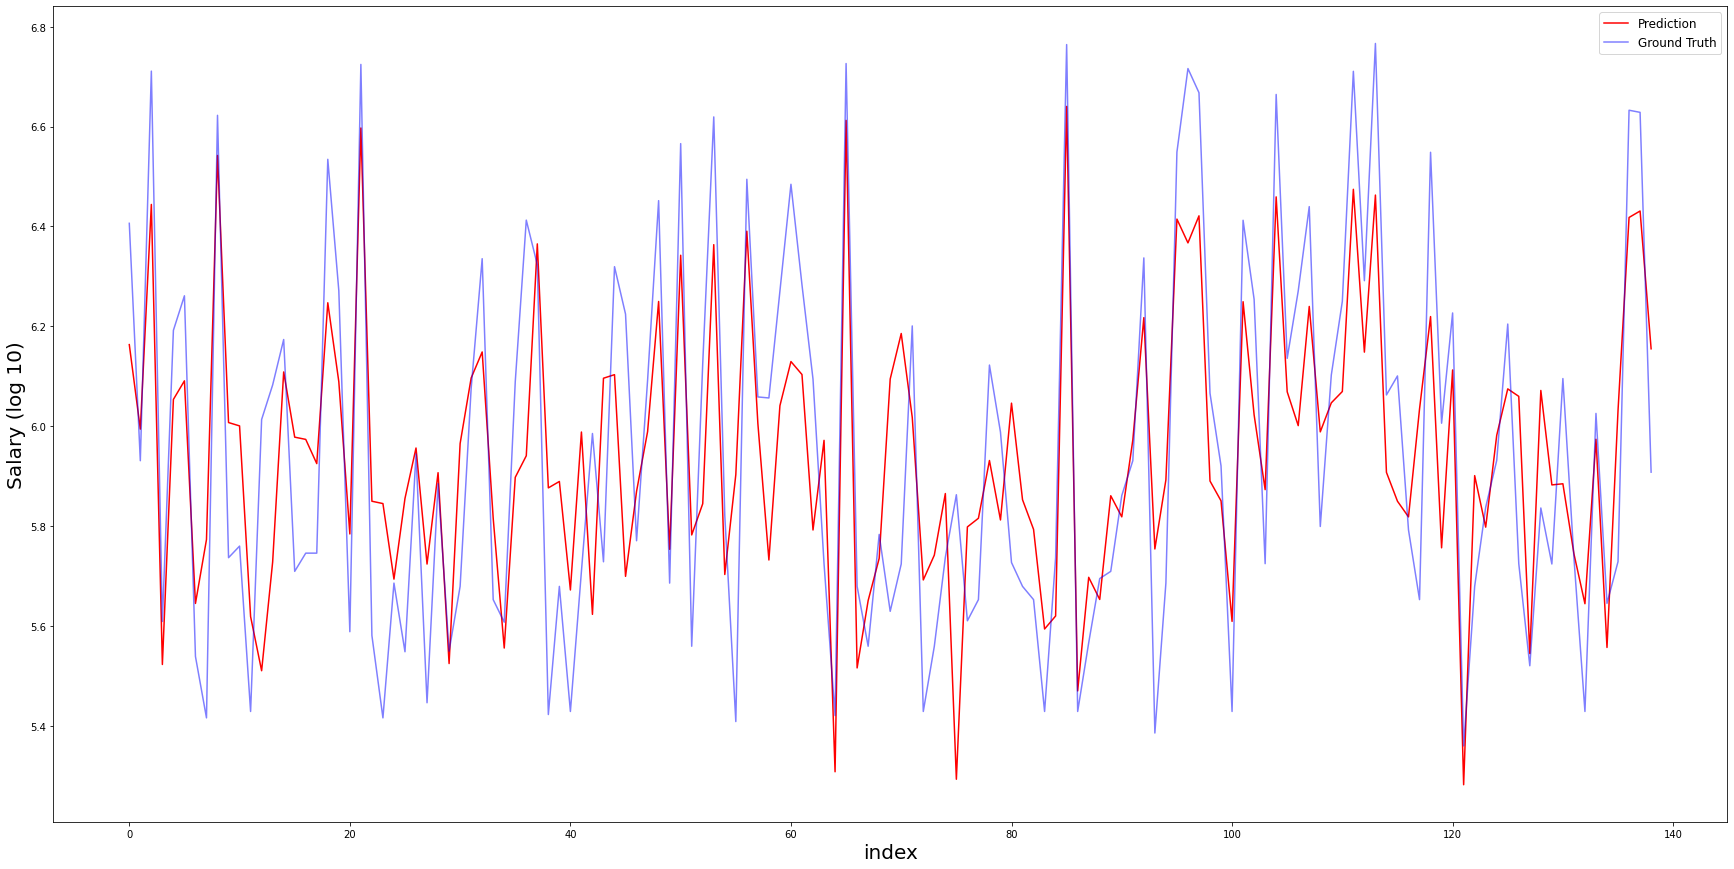

In [8]:
fig, ax = plt.subplots(figsize=(30,15))

sns.lineplot(data=predict_df[:200],ax=ax, x=predict_df.index[:200],y='prediction', label='Prediction', color='red')
sns.lineplot(data= y_valid[:200], x=y_valid.index[:200], y='salary',ax=ax, label='Ground Truth', color='blue', alpha=0.5)

plt.xlabel('index',fontsize=20)
plt.ylabel('Salary (log 10)', fontsize=20)
plt.legend(fontsize=12);


This is a similar plot as above but, it is done with the dataset for test and predict2 which is the prediction on the test set. Showing how there is a similar correlation between the prediction and ground truth, upholding the score and the accuracy of the linear regression model.

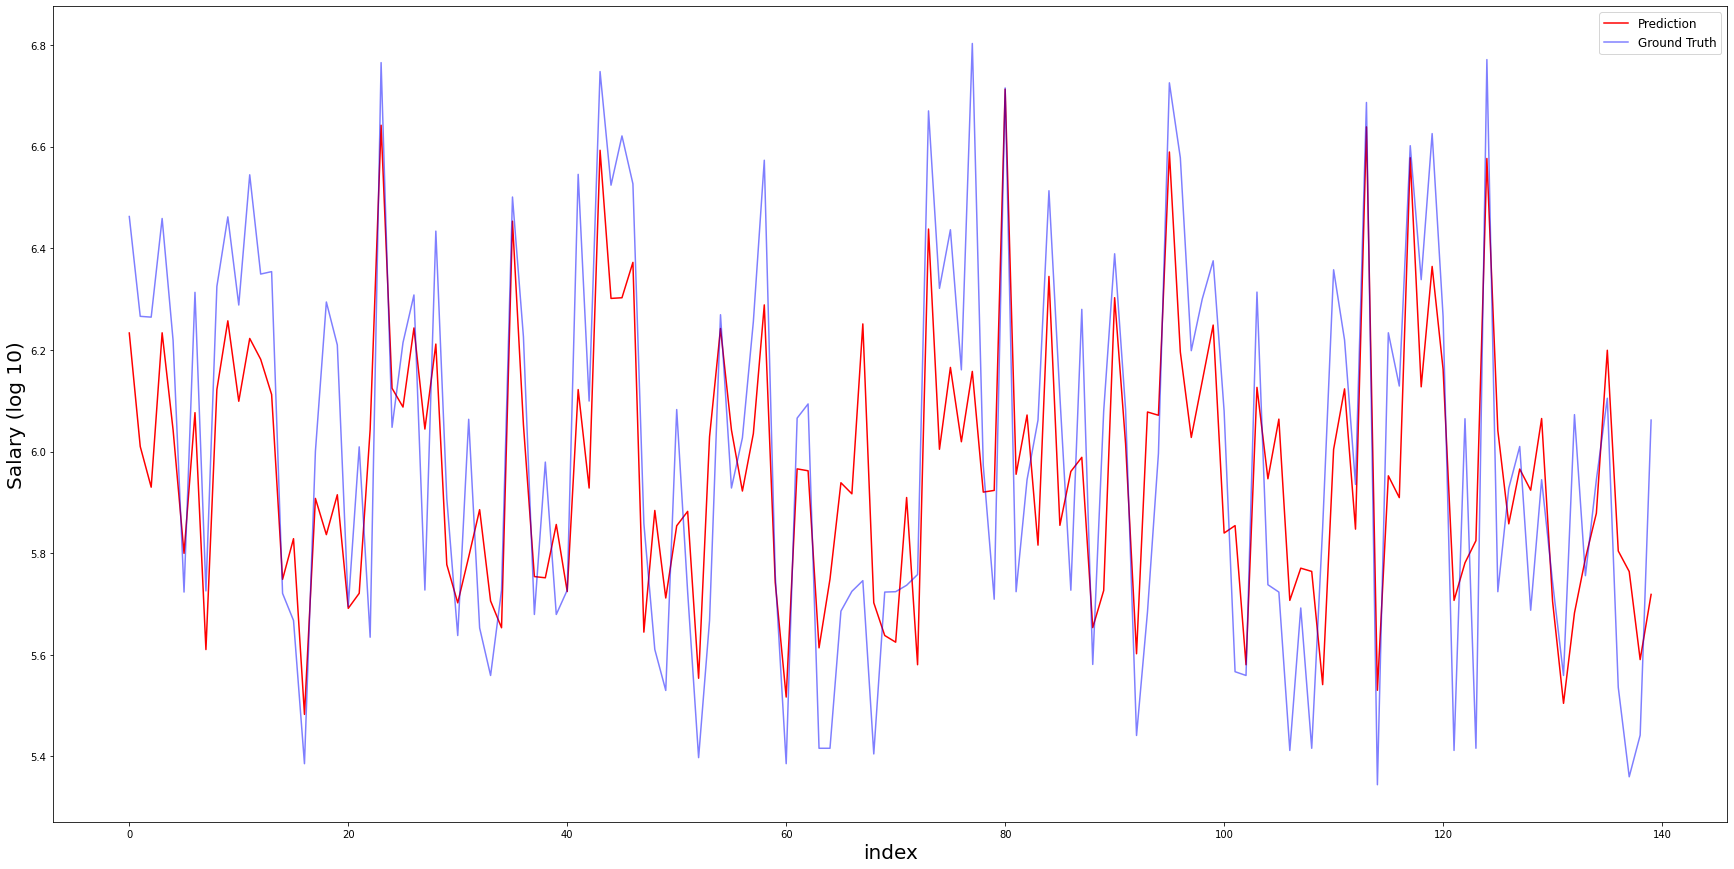

In [9]:
fig, ax = plt.subplots(figsize=(30,15))

sns.lineplot(data=predict2_df[:200],ax=ax, x=predict2_df.index[:200],y='prediction', label='Prediction', color='red')
sns.lineplot(data= y_test[:200], x=y_test.index[:200], y='salary',ax=ax, label='Ground Truth', color='blue', alpha=0.5)

plt.xlabel('index',fontsize=20)
plt.ylabel('Salary (log 10)', fontsize=20)
plt.legend(fontsize=12);


## Neural Network

### We also tried a Neural Network approach
To begin the two seperated dataframes x_df and y_salary2 are put into a single array so it is easier to split the when using train_test_split

In [10]:
both=[]
both.append(x_df)
both.append(y_salary2)

The Dataset is split into train and test sets with train_test_split with random state 1.
The y_train and y_test indexes are then reset and the index column which is made when that happens is also dropped at the same time.
The y_train_MLP set is squeezed so the shape matches what is needed to fit it into the MPLRegressor.

The X_train_MLP and y_train_MLP_squeeze is then fit into the MLPRegressor with 10000 interations as max.
The predict on the X_test_MLPR is then saved into predict MLPR and the regr score is calculated for X_test_MLPR, y_test_MLPR.
The score was 0.5 out of -1 to 1, which puts us in the upper 25 percentile.

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = both

X_train_MLP, X_test_MLP, y_train_MLP, y_test_MLP = train_test_split(X, y, random_state=1, shuffle=True)

y_train_MLP = y_train_MLP.reset_index().drop(columns='index')
y_train_MLP_squeeze = np.squeeze(y_train_MLP)
y_test_MLP = y_test_MLP.reset_index().drop(columns='index')

regr = MLPRegressor(random_state=488, max_iter=1000).fit(X_train_MLP, y_train_MLP_squeeze)
predictMLPR = regr.predict(X_test_MLP)
regr.score(X_test_MLP, y_test_MLP)

0.5070447636326382

The Graph for the first 200 is graphed with the red being the prediction and the blue being the Ground Truth labels.
(it is the first 200 because if all of them are graphed it is hard to see where the prediction and ground truth match and do not match)

With this graph it is readily observable that the prediction matches closely with the contour of the ground truth labels mostly. There can be seen prediction misses large and small all over when there is presumably a outlier in terms of NCAA score and salary. All in all the MLPRegressor does a good job at predicting and following the contour of the ground truth labels.

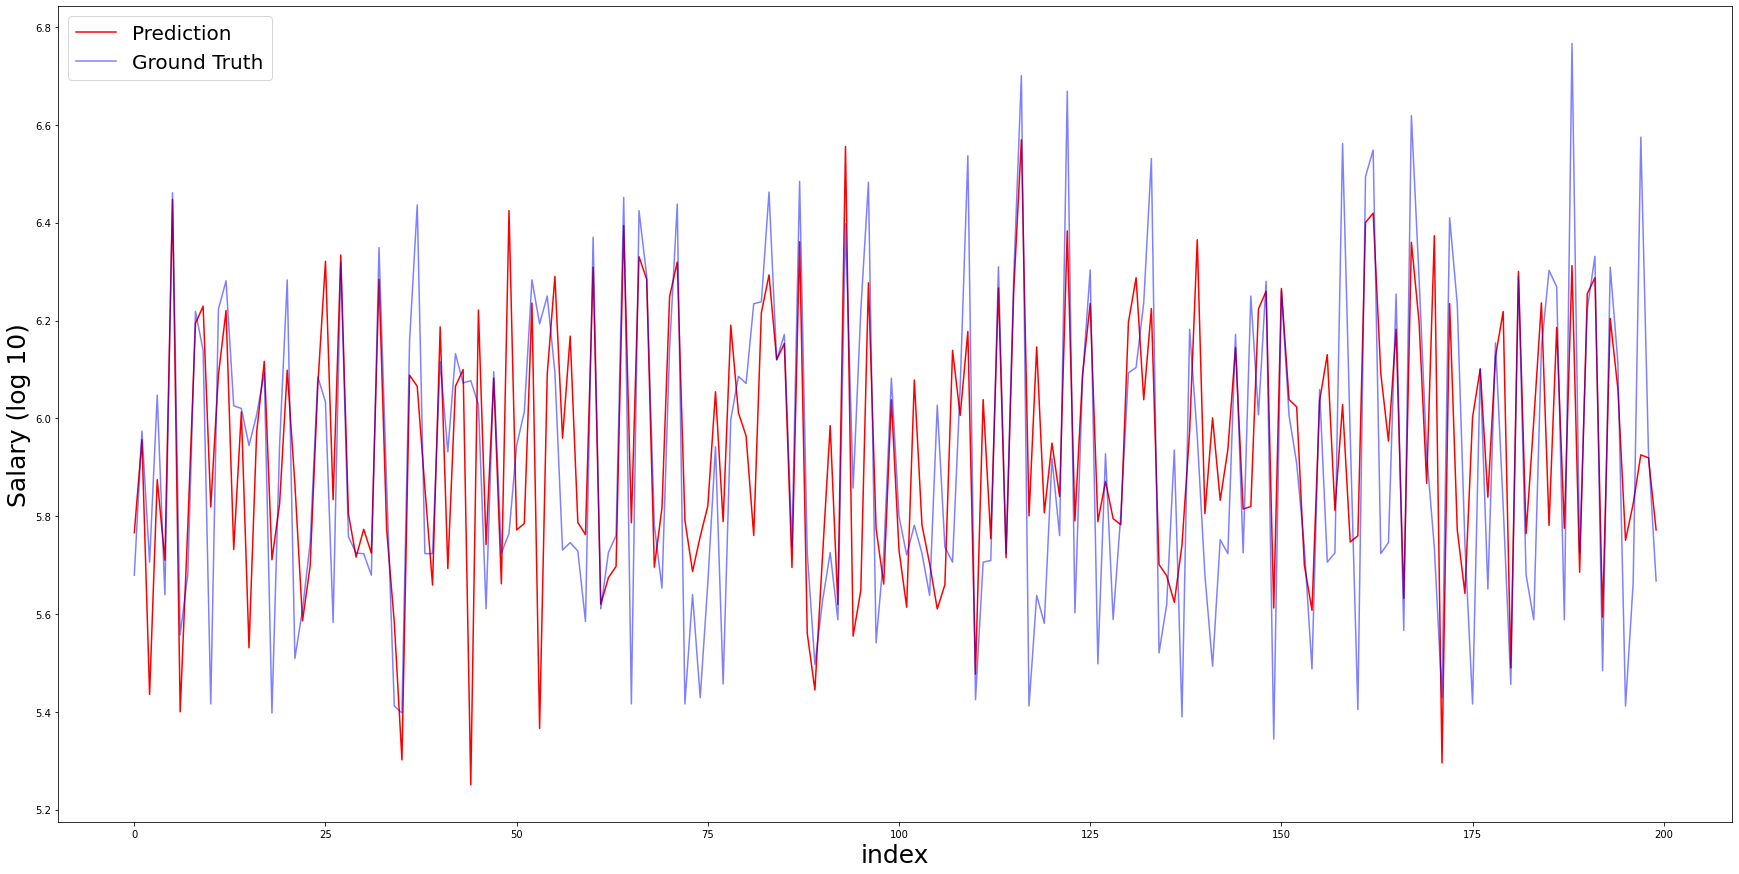

In [12]:
fig, ax = plt.subplots(figsize=(30,15));

sns.lineplot(data=predictMLPR[:200], ax=ax,color='red', label='Prediction');
sns.lineplot(data= y_test_MLP[:200], y='salary', x=y_test_MLP.index[:200],ax=ax, label='Ground Truth', color='blue', alpha=0.5);

plt.xlabel('index',fontsize=25)
plt.ylabel('Salary (log 10)', fontsize=25)
plt.legend(fontsize=20);
#ax.set_facecolor((1.0, 0.47, 0.42))